In [5]:
import numpy as np
from matplotlib import gridspec
from matplotlib import pyplot as plt
import os

OUTPUT_PATH = './output_data_used'
GT_PATH = './gt_data'

In [10]:
outputs = os.listdir(OUTPUT_PATH)
outputs = [o for o in outputs if('.npy' in o)]
s = np.array([np.load(OUTPUT_PATH + '/' + output) for output in outputs])



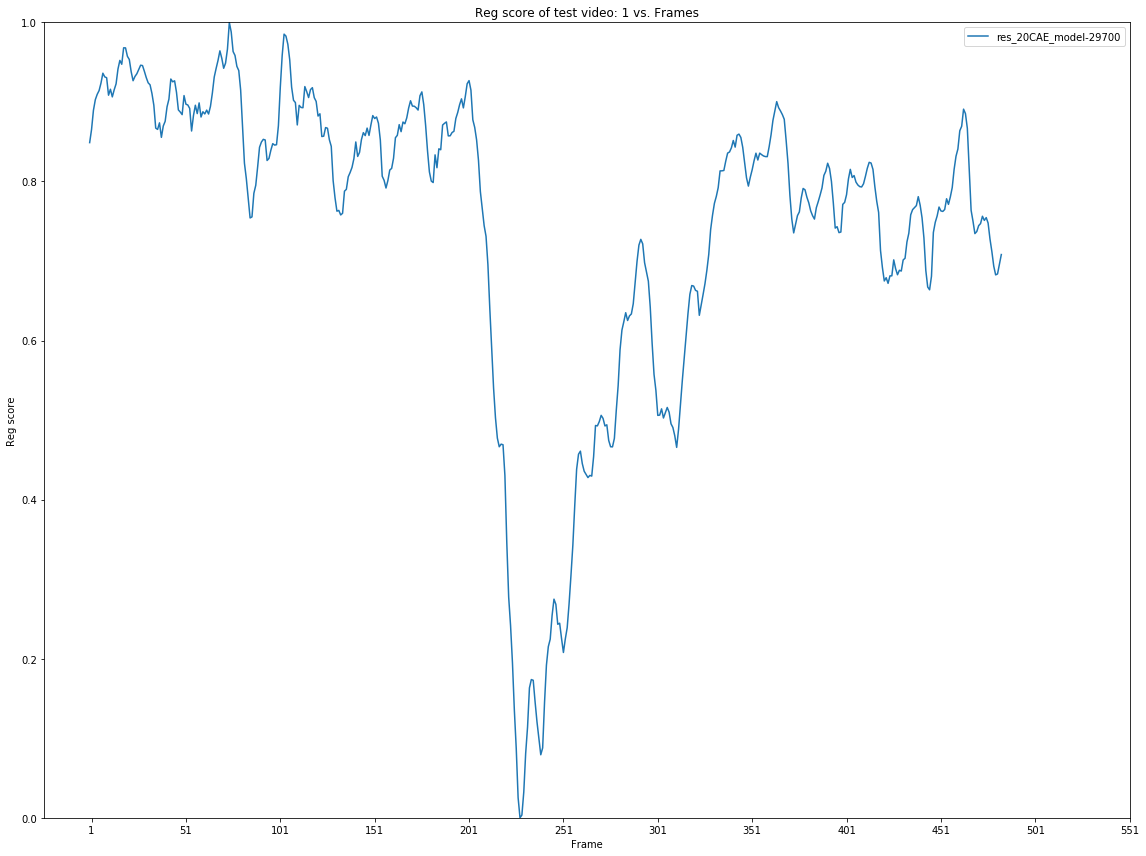

In [11]:
# Viualization

test_num = s.shape[1]
i = 1

for index in range(test_num):
    plt.figure(figsize=(16,12)) 
    model_index = 0
    for cur_s in s[:,index]:
        plt.title("Reg score of test video: %d vs. Frames" %i)
        plt.ylabel('Reg score')
        plt.xlabel('Frame')
        plt.tight_layout()
        plt.plot(cur_s, label = outputs[model_index].split('.npy')[0])
        my_x_ticks = np.arange(1, 555, 50)
        plt.xticks(my_x_ticks)
        plt.legend()
        model_index = model_index + 1
    #plt.fill_between(np.arange(0,cur_shape,1),cur_gt, facecolor = "orange", alpha = 0.2)
    plt.ylim(0,1)
    plt.savefig('reg_score_with_gt_%d.png' %i)
    i = i+1

In [46]:
def tp_calculate(threshold):

    test_num = s.shape[1]
    i = 1

    TP = [ [] for _ in range(s.shape[0])]
    P = [ [] for _ in range(s.shape[0])]
    FP = [ [] for _ in range(s.shape[0])]
    N = [ [] for _ in range(s.shape[0])]

    #threshold = 0.75

    for index in range(test_num):
        cur_gt = ground_truth[index]
        cur_shape = cur_gt.shape[0]
        model_index = 0
        for cur_s in s[:,index]:

            # The processed frames of ground truth corresponding to the current model depth
            cur_proc_gt = cur_gt[:cur_s.shape[0]]

            TP[model_index].append(np.sum( np.logical_and(cur_proc_gt,(cur_s <= threshold ))))
            FP[model_index].append(np.sum(np.logical_and(np.logical_not(cur_proc_gt),(cur_s <= threshold))))
            P[model_index].append(np.sum(cur_proc_gt))
            N[model_index].append(np.sum(np.logical_not(cur_proc_gt)))

            model_index = model_index + 1
        i = i+1
        
    tp = np.sum(TP, axis = 1)/np.sum(P, axis = 1)
    fp = np.sum(FP, axis = 1)/np.sum(N, axis = 1)
    
    return tp, fp
    

In [11]:
TP[:,0].shape

(201,)

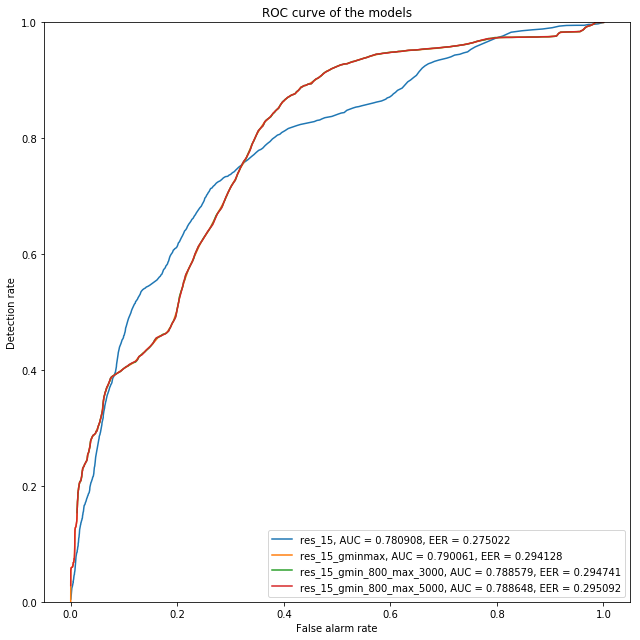

In [82]:
TP, FP = [],[]
for threshold in np.linspace(0,1,501):
    tp, fp = tp_calculate(threshold)
    TP.append(tp)
    FP.append(fp)

TP = np.array(TP)
FP = np.array(FP)

plt.figure(figsize=(9,9))
for model_index in range(TP.shape[1]):
    tp,fp = TP[:,model_index], FP[:,model_index]
    
    # Calculation of AUC and EER
    fp1 = [0.]
    fp1.extend(fp)
    fp1 = np.array(fp1)
    fp_interv = fp - fp1[:fp1.shape[0]-1]
    cur_auc = np.sum(fp_interv * tp)
    
    # EER
    tn = 1-tp
    dist = abs(tn-fp)
    cur_idx = np.where(dist==dist.min())
    cur_eer = fp[cur_idx][0]
    
    plt.title("ROC curve of the models")
    plt.ylabel('Detection rate')
    plt.xlabel('False alarm rate')
    plt.tight_layout()
    plt.plot(fp, tp,label = outputs[model_index].split('.npy')[0] + ', AUC = %f, EER = %f' %(cur_auc, cur_eer))

    plt.legend()
    plt.ylim(0, 1)
    plt.savefig('AUC_curve.png')
    

In [79]:
tp,fp = TP[:,model_index], FP[:,model_index]

In [103]:
tn = 1-fp

In [104]:
dist = abs(tn-fp)

In [112]:
cur_idx = np.where(dist==dist.min())

In [115]:
dist[cur_idx][0]

0.004405286343612369

In [39]:
model_index = 1
tp,fp = TP[:,model_index], FP[:,model_index]
fp

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [40]:
np.linspace(0,1,201)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,